# Week 3 Part 2 - Network Analysis: 2-Mode Networks

### Dennis Pong, Stefano Biguzzi, Ian Costello

## Project Overview
Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:

1. Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset.
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?

## Davis Southern Club Women
#### DESCRIPTION One 18×14 matrix, binary.

#### BACKGROUND These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

## Import data


In [217]:
import matplotlib.pyplot as plt
import networkx as nx
# from networkx.drawing.layout import spring_layout
from networkx.algorithms import bipartite
from collections import OrderedDict
plt.rcParams["figure.figsize"] = (13,11)

In [115]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

# print("Biadjacency matrix")
# print(bipartite.biadjacency_matrix(G, women, clubs))

# # project bipartite graph onto women nodes
# W = bipartite.projected_graph(G, women)
# print()
# print("#Friends, Member")
# for w in women:
#     print(f"{W.degree(w)} {w}")

# # project bipartite graph onto women nodes keeping number of co-occurence
# # the degree computed is weighted and counts the total number of shared contacts
# W = bipartite.weighted_projected_graph(G, women)
# print()
# print("#Friend meetings, Member")
# for w in women:
#     print(f"{W.degree(w, weight='weight')} {w}")

# nx.draw(G)
# plt.show()

In [5]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [6]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

## Biadjacency matrix of the bipartite graph G.

In [142]:
# print(bipartite.biadjacency_matrix(G, row_order = women, column_order = clubs))
# returns SciPy sparse matrix
print(bipartite.biadjacency_matrix(G, row_order = women, column_order = clubs)[0])


  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1


## Bipartite's Projected Graph on women

### .degree( ) returns the number of friends each women has in the bipartitle network graph

In [167]:
# W is NOT defined as multigraph
W = bipartite.projected_graph(G, women, multigraph=False)
print("#Friends, Member")
key_value1 = {}
for w in women:
    print(f"{W.degree(w)} {w}")
    # add the degree of each of the node in two node sets in bipartite graph, i.e. number of friends
    key_value1[w] = W.degree(w)



#Friends, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [ ]:
# First sort the key_value dict by Women's name in alphabetical order
# Then sort the degree of the bipartitle projected graph, which is the value of the key-value pair, in descending order

In [149]:
key_value_1 = OrderedDict(sorted(key_value1.items(), key = lambda kv:(kv[0])))

for w in OrderedDict(sorted(key_value_1.items(), key = lambda kv:(kv[1]), reverse = True)): 
    print(key_value_1[w], w)

17 Evelyn Jefferson
17 Helen Lloyd
17 Nora Fayette
17 Ruth DeSand
17 Sylvia Avondale
17 Theresa Anderson
17 Verne Sanderson
16 Dorothy Murchison
16 Katherina Rogers
16 Myra Liddel
16 Pearl Oglethorpe
15 Brenda Rogers
15 Eleanor Nye
15 Frances Anderson
15 Laura Mandeville
12 Flora Price
12 Olivia Carleton
11 Charlotte McDowd


In [124]:
# W.degree("Myra Liddel")

16

## Bipartite's Weighted Projected Graph on women

In [157]:
W1 = bipartite.weighted_projected_graph(G, women)
# the following gives the same result, but it doesn't give you the weight as a dict in the 3rd element
# W1 = bipartite.projected_graph(G, women, multigraph = True) 

print("#Friend meetings, Member")
key_value2 = {}
for w in women:
    print(f"{W1.degree(w, weight='weight')} {w}")
    key_value2[w] = W1.degree(w, weight='weight')

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [166]:
key_value_2 = OrderedDict(sorted(key_value2.items(), key = lambda kv:(kv[0])))

for w in OrderedDict(sorted(key_value_2.items(), key = lambda kv:(kv[1]), reverse = True)): 
    print(key_value_2[w], w)

57 Theresa Anderson
50 Evelyn Jefferson
46 Brenda Rogers
46 Sylvia Avondale
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Charlotte McDowd
24 Dorothy Murchison
14 Flora Price
14 Olivia Carleton


In [249]:
W1.edges(data=True)


[('Evelyn Jefferson', 'Myra Liddel', {'weight': 2}),
 ('Evelyn Jefferson', 'Olivia Carleton', {'weight': 1}),
 ('Evelyn Jefferson', 'Pearl Oglethorpe', {'weight': 3}),
 ('Evelyn Jefferson', 'Katherina Rogers', {'weight': 2}),
 ('Evelyn Jefferson', 'Frances Anderson', {'weight': 4}),
 ('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7}),
 ('Evelyn Jefferson', 'Nora Fayette', {'weight': 2}),
 ('Evelyn Jefferson', 'Laura Mandeville', {'weight': 6}),
 ('Evelyn Jefferson', 'Verne Sanderson', {'weight': 2}),
 ('Evelyn Jefferson', 'Charlotte McDowd', {'weight': 3}),
 ('Evelyn Jefferson', 'Brenda Rogers', {'weight': 6}),
 ('Evelyn Jefferson', 'Dorothy Murchison', {'weight': 2}),
 ('Evelyn Jefferson', 'Eleanor Nye', {'weight': 3}),
 ('Evelyn Jefferson', 'Flora Price', {'weight': 1}),
 ('Evelyn Jefferson', 'Ruth DeSand', {'weight': 3}),
 ('Evelyn Jefferson', 'Sylvia Avondale', {'weight': 2}),
 ('Evelyn Jefferson', 'Helen Lloyd', {'weight': 1}),
 ('Laura Mandeville', 'Myra Liddel', {'weight': 

In [235]:
# define weights that can be passed into draw_circular
weights=[edata['weight'] for f,t,edata in W1.edges(data=True)]



## Drawing Circular Network Graph for Women

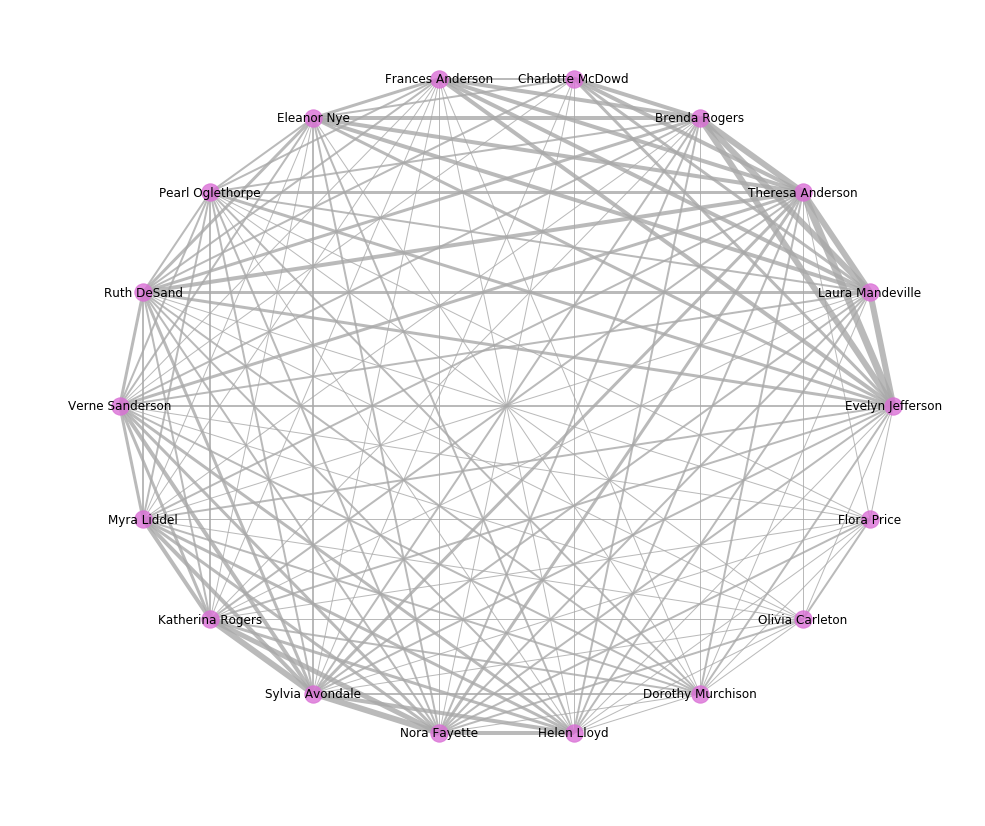

In [239]:

nx.draw_circular(W1,width=weights, edge_color="darkgray", node_color="orchid", with_labels=True, node_size=301, \
                 font_size=12, font_family="calibri", alpha=0.8)

## Drawing Spring Layout Graph for Women

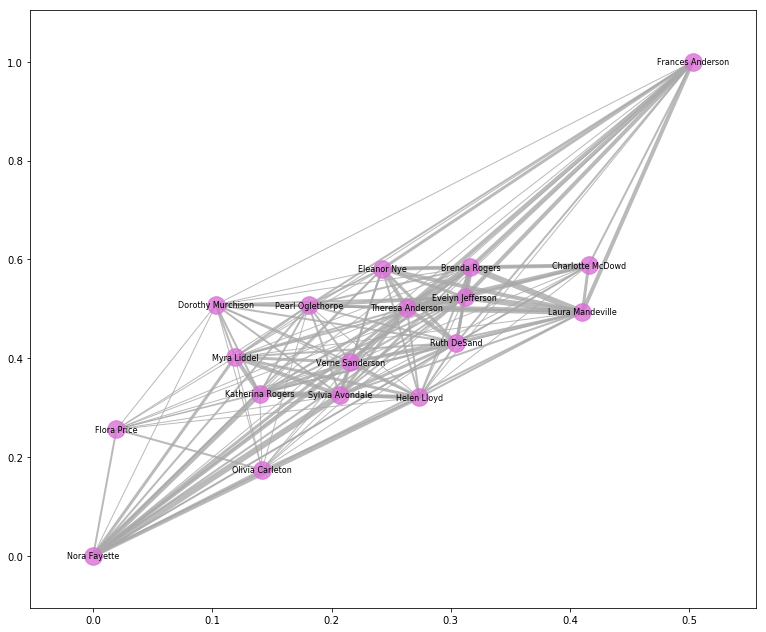

In [240]:

pos = nx.spring_layout(W1)

nx.draw_networkx(W1,pos,with_labels=True, node_size=309, node_color="orchid", font_size=8, font_family="calibri", \
                 width=weights, edge_color="darkgray", alpha=0.8)

## Clubs

In [241]:
C = bipartite.projected_graph(G, clubs, multigraph=False)
print("#Connections, Club")
key_value1 = {}
for c in clubs:
    print(f"{C.degree(c)} {c}")
    key_value1[c] = C.degree(c)



#Connections, Club
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


In [242]:
# With the proper sorting by Club ID first, then descending order by connections
key_value_1 = OrderedDict(sorted(key_value1.items(), key = lambda kv:(kv[0])))

for c in OrderedDict(sorted(key_value_1.items(), key = lambda kv:(kv[1]), reverse = True)): 
    print(key_value_1[c], c)

13 E6
13 E7
13 E8
13 E9
8 E1
8 E10
8 E11
8 E12
8 E13
8 E14
8 E2
8 E3
8 E4
8 E5


In [265]:
# C1 = bipartite.projected_graph(G, clubs, multigraph = True) 
C1 = bipartite.weighted_projected_graph(G, clubs)
print("#Club attendance, Club ID")
key_value2 = {}
for c in clubs:
    print(f"{C1.degree(c, weight='weight')} {c}")
    key_value2[c] = C1.degree(c, weight='weight')

#Club attendance, Club ID
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


In [266]:
# Again, with proper sorting... Club ID (ascending), then club attendance in descending order
key_value_2 = OrderedDict(sorted(key_value2.items(), key = lambda kv:(kv[0])))

for c in OrderedDict(sorted(key_value_2.items(), key = lambda kv:(kv[1]), reverse = True)): 
    print(key_value_2[c], c)

59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


In [267]:
# Extracting weight from the dictionary
weights=[edata['weight'] for f,t,edata in C1.edges(data=True)]

## Drawing Circular Network Graph for Clubs

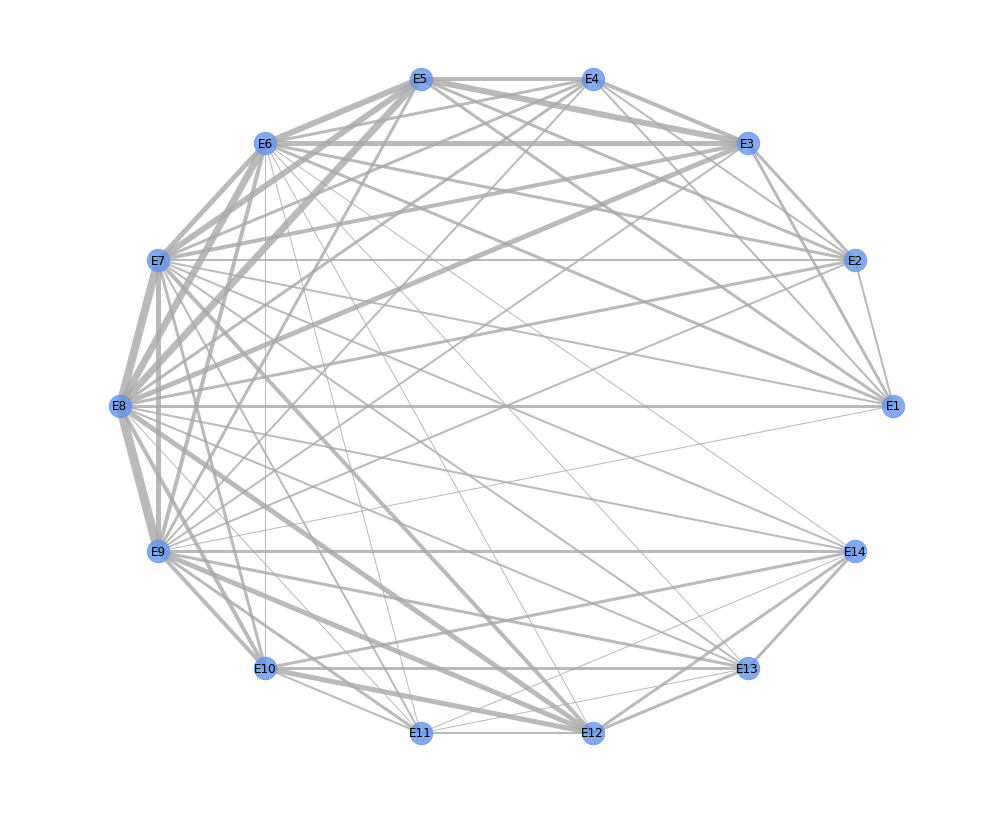

In [274]:
nx.draw_circular(C1, width=weights, edge_color="darkgray", node_color="cornflowerblue", with_labels=True, node_size=501,
                 font_size=12, font_family="calibri", alpha=0.8)

What stands out the most is there is no connection between E1 and E14, meaning there is no attendance of women who joined the club E1 and E14 simultanenously

## Drawing Spring Layout Graph for Clubs

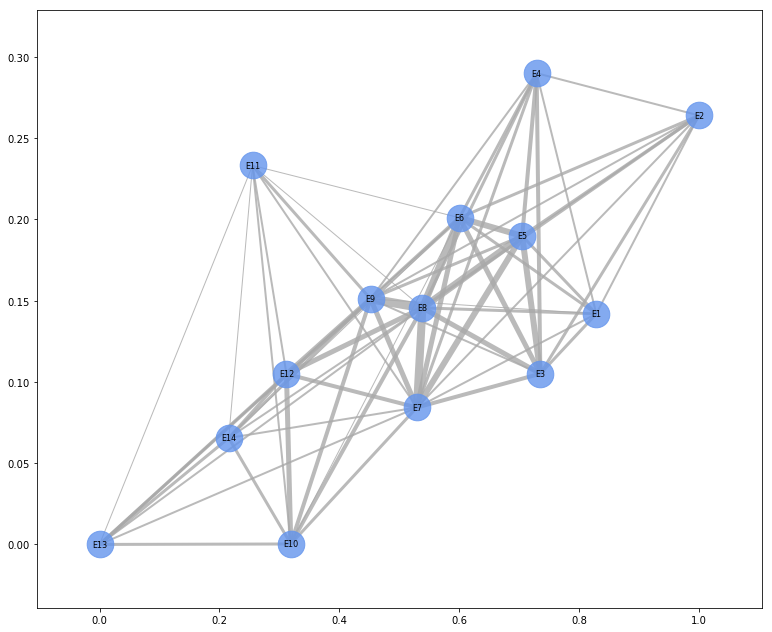

In [275]:
pos = nx.spring_layout(C1)

nx.draw_networkx(C1,pos,with_labels=True, node_size=709, node_color="cornflowerblue", font_size=8, font_family="calibri", \
                 width=weights, edge_color="darkgray", alpha=0.8)

In the Spring layout graph you can clearly see the four most influential clubs (E12, E9, E8, E7, E6 and E5) at the 
center of the graph, and we can see some weaknesses between E13 and E11 and followed by E1 and E2, which are 
coincidentally on the edge of the network.



In [278]:
# add additional commentaries on women proj. graph and weighted projected graph.

SyntaxError: invalid syntax (<ipython-input-278-7a80bf2af39e>, line 1)

In [279]:
# maybe add the eigenvector centrality and other centraity measures

Draw bimodal network graphs

Conclusion and findings

scratch pad

In [105]:
B = nx.Graph()

In [106]:
B.add_edges_from([("a", 1), ("b", 1), ("a", 2), ("b", 2)])

In [107]:
G = bipartite.projected_graph(B, ["a", "b"], multigraph=True)

In [108]:
print([sorted((u, v)) for u, v in G.edges()])

[['a', 'b'], ['a', 'b']]
